In [ ]:
# there are two types of tensors objects in a graph
# variable
# placeholder

# variables are used for varying value sucg as weights
# placeholders are used for inputing the data such as img pixels

# REMEMBER 
# jb bhi ap placeholder ya varibales ko use krny valy hogy to apko phly global variables Initialize krany paren gy.

# matrix multiplication k andar 1st matrix ki num of rows ayen gi or 2nd matrix k num of cols ayen gy, resulting matrix me.

In [1]:
import tensorflow as tf 

In [73]:
sess = tf.InteractiveSession()

In [9]:
my_tensor = tf.random_uniform((4, 4), 0, 1)
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [59]:
my_var = tf.Variable(initial_value = my_tensor)
print(my_var)

<tf.Variable 'Variable_5:0' shape=(4, 4) dtype=float32_ref>


In [60]:
# if i want to run this variable , first i need to initalize it
# then create a session and run initializer into the session like sess.run(init) but rememebr first create a session with
# "with" keyword.
# we can initialize the variable by : 

init = tf.global_variables_initializer()

In [61]:
sess.run(init)

In [62]:
sess.run(my_var)

array([[0.9809334 , 0.780046  , 0.14625418, 0.755656  ],
       [0.85796607, 0.98035717, 0.20472431, 0.47125018],
       [0.5180553 , 0.3934815 , 0.12704456, 0.8709209 ],
       [0.5111722 , 0.77674425, 0.8369374 , 0.7011068 ]], dtype=float32)

In [ ]:
# if u r creating a variable and u tend to use it then u should first initiaize the variable 

In [16]:
# ph = tf.placeholder(tf.float32, shape(None, 5))
ph = tf.placeholder(tf.float32)

In [18]:
# Build a graph
# initiate the session
# feed data in and get output 

In [19]:
import numpy as np
import tensorflow as tf 

In [20]:
np.random.seed(101)
tf.set_random_seed(101)
# they create random data but everytime they run they create same random data blc of using seed

In [22]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[99.43179012, 52.06653967, 57.87895355, 73.48190583, 54.19617722],
       [91.31535577, 80.7920151 , 40.29978307, 35.72243428, 95.28767147],
       [34.36315779, 86.50998163, 83.02777122, 53.81614492, 92.24693726],
       [ 9.71464798, 10.28474932, 70.15072957, 89.04798691, 15.95603009],
       [27.55725449, 67.24915297, 16.4303124 , 70.13711366, 48.76352222]])

In [23]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[68.06777682],
       [52.15481923],
       [ 4.33966944],
       [22.39366035],
       [57.52050869]])

In [30]:
a = tf.placeholder(tf.float32)  # datatype of placeholder is float32
b = tf.placeholder(tf.float32)

In [31]:
# adding opeartions i.e addition and multiplication 
# there are two ways for doing this 

In [32]:
# tf.add(a, b)
# tf.multiply(a, b)
# tf.matmul(a, b)
# OR

In [33]:
add_op = a + b
mult_op = a * b

In [38]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a: rand_a, b :rand_b})  # through feed_dict we provide data to placeholders.
    print(add_result)
    print("\n")
    mul_result = sess.run(mult_op, feed_dict={a: rand_a, b :rand_b})  # through feed_dict we provide data to placeholders.
    print(mul_result)

[[167.49957  120.13432  125.94673  141.54968  122.26396 ]
 [143.47017  132.94684   92.454605  87.87726  147.44249 ]
 [ 38.702827  90.84965   87.36744   58.15581   96.58661 ]
 [ 32.108307  32.67841   92.54439  111.44165   38.34969 ]
 [ 85.07776  124.76966   73.95082  127.65762  106.28403 ]]


[[6768.1016  3544.0537  3939.6917  5001.75    3689.0134 ]
 [4762.5356  4213.693   2101.828   1863.0972  4969.7114 ]
 [ 149.12474  375.42468  360.31305  233.54427  400.3212 ]
 [ 217.54652  230.31317 1570.9315  1994.1104   357.3139 ]
 [1585.1073  3868.2053   945.07996 4034.3225  2804.9026 ]]


# Example Neural Network 

In [39]:
n_features = 10
n_dense_neurons = 3

In [40]:
x = tf.placeholder(tf.float32, (None, n_features))   # dont know rows and 10 columns

In [64]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))  # 10 by 3 matrix
b = tf.Variable(tf.ones([n_dense_neurons]))  # only 3 rows

In [78]:
init = tf.global_variables_initializer()
sess.run(init)

In [82]:
#sess.run(w)

In [67]:
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(w)
    print(result)
    print("\n")
    print(sess.run(b))

[[-1.351131    1.0004569   0.19184637]
 [ 0.70691276 -1.4440542   0.5867468 ]
 [ 0.41477954  1.3655847   0.14196369]
 [-0.795965   -1.5752718  -0.21512866]
 [-0.08067881  0.5758606  -1.6640288 ]
 [-1.880496   -1.8799665   0.34365243]
 [-1.0588326   0.19038716 -1.1754818 ]
 [ 0.17266348 -0.14825402 -0.6899556 ]
 [ 0.9046567   0.59042996 -2.7710044 ]
 [-0.31040698  0.7869421  -1.4620866 ]]


[1. 1. 1.]


In [84]:
xw = tf.matmul(x, w)
z = tf.add(xw, b)

In [77]:
a = tf.sigmoid(z)

In [85]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict ={x: np.random.random([1, n_features])}) # 1 row and 10 cols

In [86]:
print(layer_out)

[[0.47100762 0.60972166 0.07546671]]


# Simple Regression Example

In [92]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-0.88941714,  0.50817234,  1.4051899 ,  1.97783999,  5.65635852,
        4.29586617,  6.98831548,  8.17031789,  8.52271468,  8.53972303])

In [93]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([ 1.02665824,  0.76592435,  2.37721976,  3.96494775,  4.970281  ,
        6.13924955,  6.19403697,  7.51494947,  8.10826179, 11.40650793])

In [94]:
import matplotlib.pyplot as plt

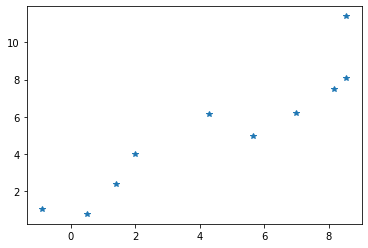

In [96]:
plt.plot(x_data, y_label, "*")

y = mx + b

In [102]:
# we are choosing m and b values randomly 
np.random.rand(2)

array([0.91388953, 0.70098749])

In [103]:
m = tf.Variable(0.35)
b = tf.Variable(0.73)

In [104]:
# COst function 
error = 0
for x, y in zip(x_data, y_label):
    
    y_hat = m*x + b
    # the values of m and b are totally random so we have to reduce the error of m and b values, x is our data. we have to fit
    # m and b values to it. y_hat is a predicted value
    # y is a correct label 
    error += (y - y_hat)**2
    
    # now we have calculated error now we need to minimize it with the help of an optimizer 

In [105]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.002)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [106]:
init = tf.global_variables_initializer()

In [115]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 200
    for i in range(training_steps):
        sess.run(train)
        
    final_slope , final_intercept = sess.run([m, b])  # final_slope is m and final_intercept is b

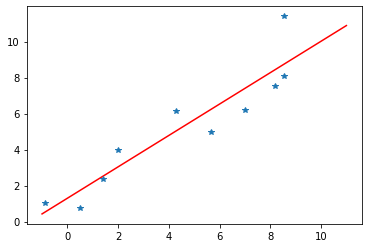

In [116]:
# lets test the tuned value of m and b on test dataset
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope * x_test + final_intercept
# now ploting our line on test data

plt.plot(x_test, y_pred_plot, "r")
plt.plot(x_data, y_label, "*")

In [ ]:
# matrix multiplication k andar 1st matrix ki num of rows ayen gi or 2nd matrix k num of cols ayen gy, resulting matrix me.
# yeh hai sary data ko ak sth training krany k lye without breaking into batches